In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,BatchNormalization
from tensorflow.keras.datasets import mnist
import tensorflow.keras.backend as K

In [34]:
# Load the mnist dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [35]:
# Print the dimensions of the dataset

print("Dimension of x_train",x_train.shape)
print("Dimension of x_test",x_test.shape)
print("Dimension of y_test",y_test.shape)

Dimension of x_train (60000, 28, 28)
Dimension of x_test (10000, 28, 28)
Dimension of y_test (10000,)


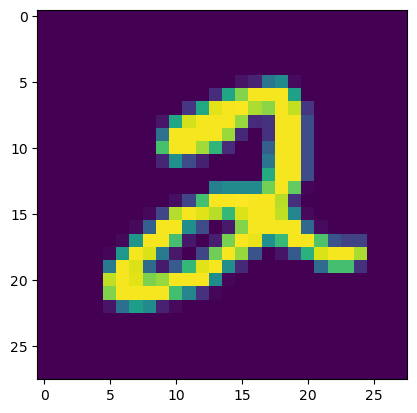

2


In [36]:
#we will see a single image in out dataset
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(x_train[5])
plt.show()
print(y_train[5])

In [37]:
# Define some parameters for the model

num_classes = 10
#as we have 10 classes (0-9) 
#we need to prdeict one out of 10 which has high probability
epochs = 30
batch_size = 128
img_rows = 28 
img_cols = 28
#as each image is 28 by 28 pixel

In [38]:
#normalizing image 
x_train =x_train.astype(float)
x_train =x_train/255
x_test =x_test.astype(float)
x_test =x_test/255
#y_train =y_train/255
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10, dtype = 'float32')
y_test = to_categorical(y_test, num_classes = 10, dtype = 'float32')

In [39]:
#format in which image are feed to our model 
#there are two cases possible either we can have channel first than image dimension
#or we can have dimension first than channel 
#we have one channel as it is a grey scale image therfore '1'
if K.image_data_format() =='channels_first':
    x_train = x_train.reshape(x_train.shape[0],1,img_rows,img_cols)
    x_test = x_test.reshape(x_test.shape[0],1,img_rows,img_cols)
    input_shape = (1,img_rows,img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
    x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
    input_shape = (img_rows,img_cols,1)

In [40]:
#build our model
#BY DEFAULT STRIDE IS 1
model = Sequential()
model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = input_shape))
model.add(MaxPooling2D())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

In [41]:
# compile our model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 batch_normalization_15 (Bat  (None, 11, 11, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_20 (Conv2D)          (None, 6, 6, 32)          25632     
                                                                 
 batch_normalization_16 (Bat  (None, 6, 6, 32)        

In [ ]:
#fit the model
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test,y_test))

Epoch 1/30
469/469 [==============================] - 48s 98ms/step - loss: 0.3748 - accuracy: 0.8922 - val_loss: 0.0853 - val_accuracy: 0.9752
Epoch 2/30
469/469 [==============================] - 48s 102ms/step - loss: 0.1028 - accuracy: 0.9724 - val_loss: 0.0615 - val_accuracy: 0.9788
Epoch 3/30
119/469 [======>.......................] - ETA: 34s - loss: 0.0748 - accuracy: 0.9812

In [ ]:
score ,acc = model.evaluate(x_test,y_test)
print("Score is :",score)
print("Accuracy :",acc)

In [ ]:
#save our model

model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("models.h5")

In [ ]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model,'models/model.h5')